## Lab 3
### Name: Behnam Sobhani Nadri
### Student ID: 801368949

## All libraries that we use in the lab is defined here

In [133]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from matplotlib.colors import ListedColormap
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem I
###Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

In [134]:
file_path='/content/drive/My Drive/Courses/Intro to ML/Lab3/diabetes.csv'
df_diabet = pd.read_csv(file_path)
df_diabet

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [135]:
# X = df_diabet.iloc[:,[1,2]].values
# X = df_diabet.iloc[:,[1,4]].values
X = df_diabet.iloc[:,[1,5]].values
# X = df_diabet.iloc[:,[1,6]].values
# X = df_diabet.iloc[:,[1,7]].values
# X = df_diabet.iloc[:,[5,6]].values
X = df_diabet.iloc[:,0:7].values
Y = df_diabet.iloc[:,8].values

### Scaling and Standarization

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)
# X_train.shape
# X_test.shape

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# X_train.shape
# X_test.shape

### Logitic Regression Classifier

In [137]:
# classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier = LogisticRegression(random_state=0, solver='lbfgs', penalty=None, max_iter=500)
# classifier = LogisticRegression(random_state=0, solver='liblinear', max_iter=500)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
# Y_pred
# cnf_matrix = confusion_matrix (Y_test, Y_pred)
cnf_matrix = confusion_matrix (Y_test, Y_pred,normalize='true')
cnf_matrix

array([[0.9       , 0.1       ],
       [0.40322581, 0.59677419]])

### Accuracy, Precision, Recall and F1-Score

In [138]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.8020833333333334
Precision: 0.74
Recall: 0.5967741935483871
F1-score: 0.6607142857142857


### Confusion Matrix

In [139]:
# class_names=[0,1]
# fig, x = plt.subplots()
# tick_marks=np.arange(len(class_names))
# plt.xticks(tick_marks,class_names)
# plt.yticks(tick_marks,class_names)
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True , cmap="tab10", fmt='g')
# plt.tight_layout()
# plt.title("Confusion Matrix", y=1.1)
# plt.xlabel("Predicted Label")
# plt.ylabel("Actual Label")


Confusion matrix, without normalization
[[117  13]
 [ 25  37]]
Normalized confusion matrix
[[0.9        0.1       ]
 [0.40322581 0.59677419]]


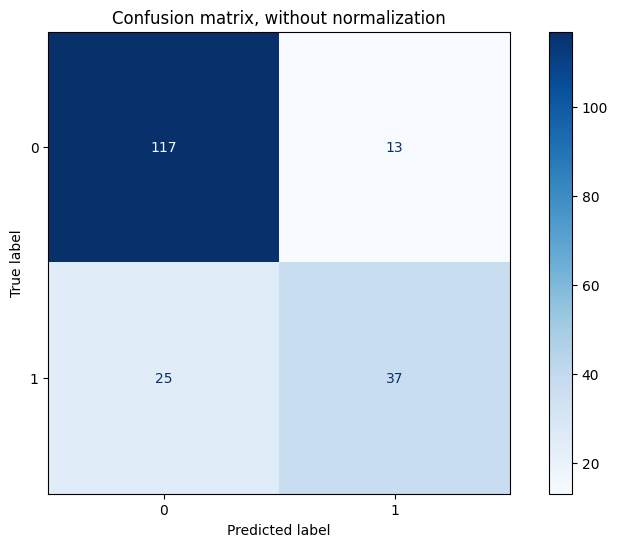

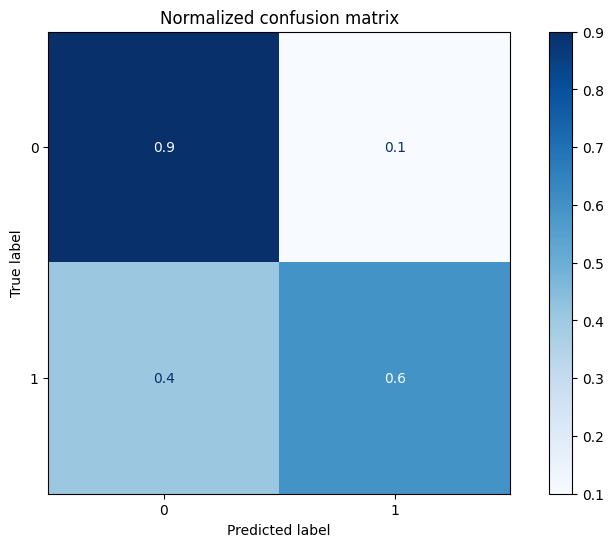

In [140]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    # plt.savefig(f'fig/conf_matrix_{classifier}')

In [141]:
# warnings.filterwarnings('ignore')
# X_set, Y_set = X_test, Y_test
# X1, X2  = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('grey', 'white')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(Y_set)):
#     plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
#                 c = ListedColormap(('blue', 'magenta'))(i), label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

## Problem II A
### Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, recall and F1 score. At the end, plot the confusion matrix representing your binary classifier.

In [142]:
file_path='/content/drive/My Drive/Courses/Intro to ML/Lab3/cancer.csv'
df_cancer = pd.read_csv(file_path)

df_cancer1 = (df_cancer.iloc[:,1] == "M").replace(True,1).replace(False,0)
df_cancer = pd.concat([df_cancer.drop(["diagnosis", "Unnamed: 32"],axis=1), df_cancer1], axis = 1)
df_cancer

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [143]:
X = df_cancer.iloc[:,1:31].values
Y = df_cancer.iloc[:,31].values

### Scaling and Standarization

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)

In [145]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Logitic Regression Classifier

In [146]:
# classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier = LogisticRegression(random_state=0, solver='lbfgs', penalty=None, max_iter=500)
# classifier = LogisticRegression(random_state=0, solver='liblinear', max_iter=500)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cnf_matrix = confusion_matrix (Y_test, Y_pred,normalize='true')
cnf_matrix

array([[0.94444444, 0.05555556],
       [0.05660377, 0.94339623]])

### Accuracy, Precision, Recall and F1-Score

In [147]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.9440559440559441
Precision: 0.9090909090909091
Recall: 0.9433962264150944
F1-score: 0.9259259259259259


### Confusion Matrix

Confusion matrix, without normalization
[[85  5]
 [ 3 50]]
Normalized confusion matrix
[[0.94444444 0.05555556]
 [0.05660377 0.94339623]]


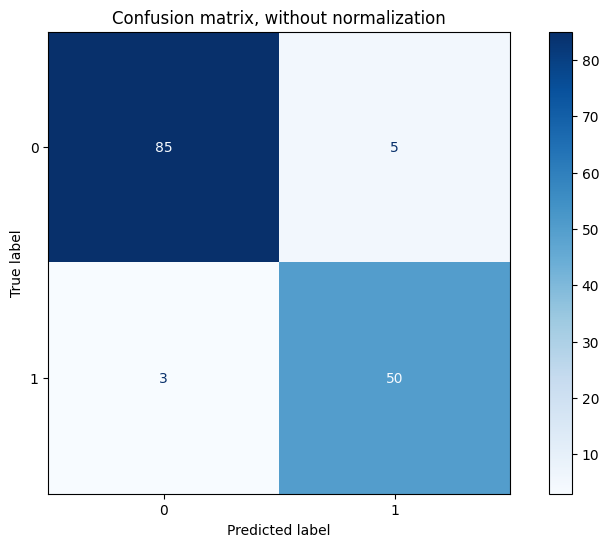

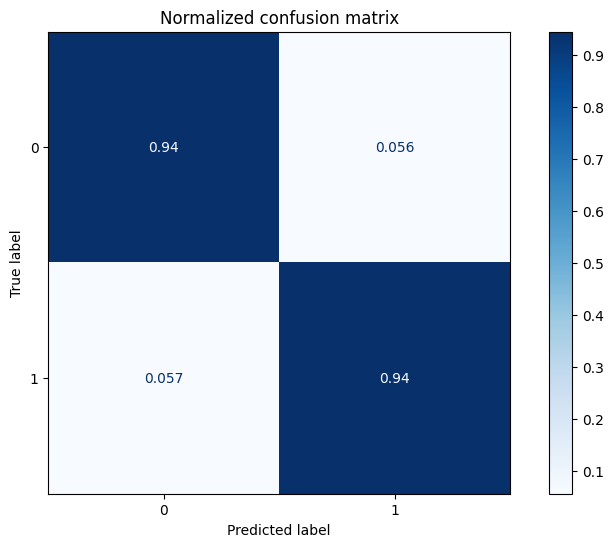

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    # plt.savefig(f'fig/conf_matrix_{classifier}')

## Problem II B
### How about adding a weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.

### Logitic Regression Classifier

In [149]:
classifier = LogisticRegression(random_state=0, solver='liblinear', penalty='l2', max_iter=500)
# classifier = LogisticRegression(random_state=0, solver='liblinear', max_iter=500)
# classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cnf_matrix = confusion_matrix (Y_test, Y_pred,normalize='true')
cnf_matrix

array([[0.96666667, 0.03333333],
       [0.05660377, 0.94339623]])

### Accuracy, Precision, Recall and F1-Score

In [150]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.958041958041958
Precision: 0.9433962264150944
Recall: 0.9433962264150944
F1-score: 0.9433962264150944


### Confusion Matrix

Confusion matrix, without normalization
[[87  3]
 [ 3 50]]
Normalized confusion matrix
[[0.96666667 0.03333333]
 [0.05660377 0.94339623]]


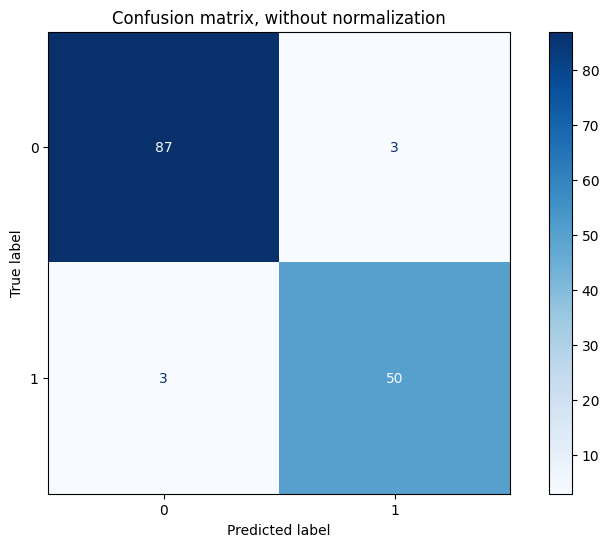

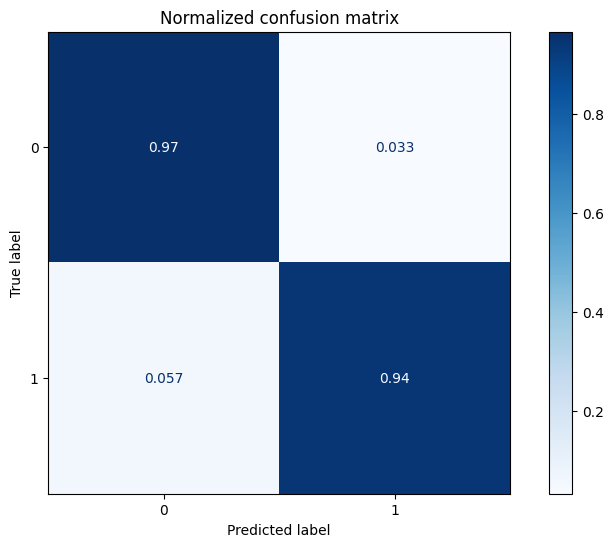

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    # plt.savefig(f'fig/conf_matrix_{classifier}')

## Problem III
### Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test). Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.

### Naive Bayes Classifier

In [118]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

cnf_matrix = confusion_matrix (Y_test, Y_pred,normalize='true')
cnf_matrix

array([[0.93333333, 0.06666667],
       [0.11320755, 0.88679245]])

### Accuracy, Precision, Recall and F1-Score

In [119]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test,Y_pred))
print("Recall:", metrics.recall_score(Y_test,Y_pred))
print("F1-score:", metrics.f1_score(Y_test,Y_pred))

Accuracy: 0.916083916083916
Precision: 0.8867924528301887
Recall: 0.8867924528301887
F1-score: 0.8867924528301887


### Confusion Matrix

Confusion matrix, without normalization
[[84  6]
 [ 6 47]]
Normalized confusion matrix
[[0.93333333 0.06666667]
 [0.11320755 0.88679245]]


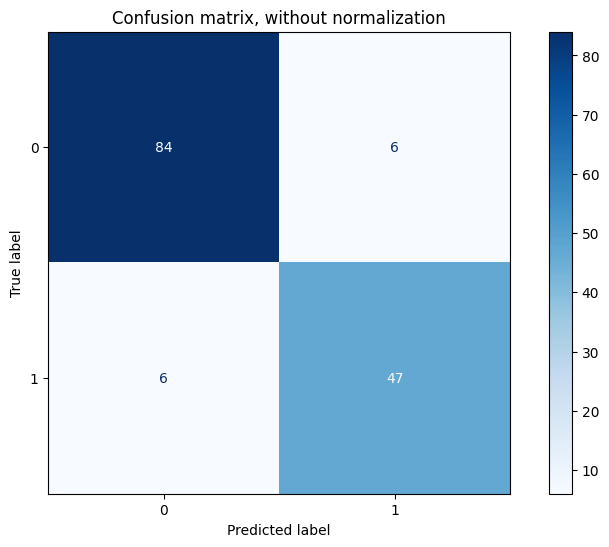

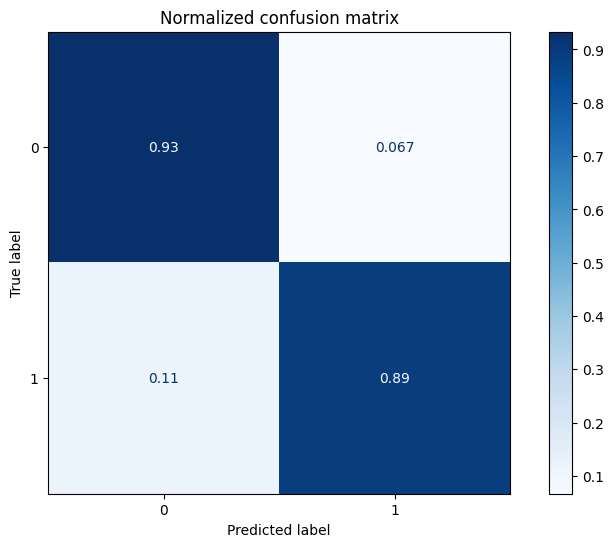

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    Y_test,
    display_labels=classifier.classes_,
    cmap=plt.cm.Blues,
    normalize=normalize
  )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

    # plt.savefig(f'fig/conf_matrix_{classifier}')

## Problem IV
### Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare it against problems 2 and 3.

In [121]:
file_path='/content/drive/My Drive/Courses/Intro to ML/Lab3/cancer.csv'
df_cancer = pd.read_csv(file_path)

df_cancer1 = (df_cancer.iloc[:,1] == "M").replace(True,1).replace(False,0)
df_cancer = pd.concat([df_cancer.drop(["diagnosis", "Unnamed: 32"],axis=1), df_cancer1], axis = 1)
df_cancer

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [122]:
X = df_cancer.iloc[:,1:31].values
Y = df_cancer.iloc[:,31].values

### Logitic Regression Classifier

In [123]:
K=29
accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):
    # X = df_cancer.iloc[:,1:31].values
    # Y = df_cancer.iloc[:,31].values
    # print(i)
    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 0)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


Maximum Accuracy is: 0.972027972027972
Maximum Accuracy is at K: 12.0


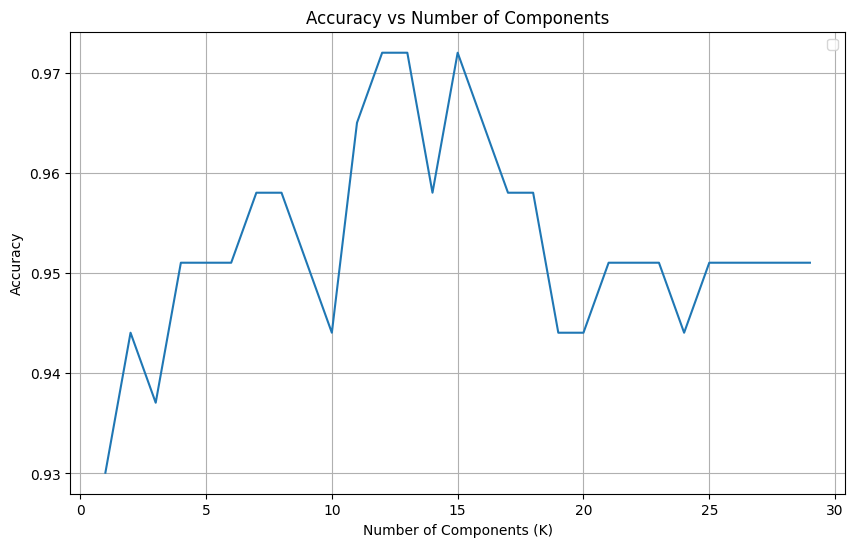

In [124]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.legend()

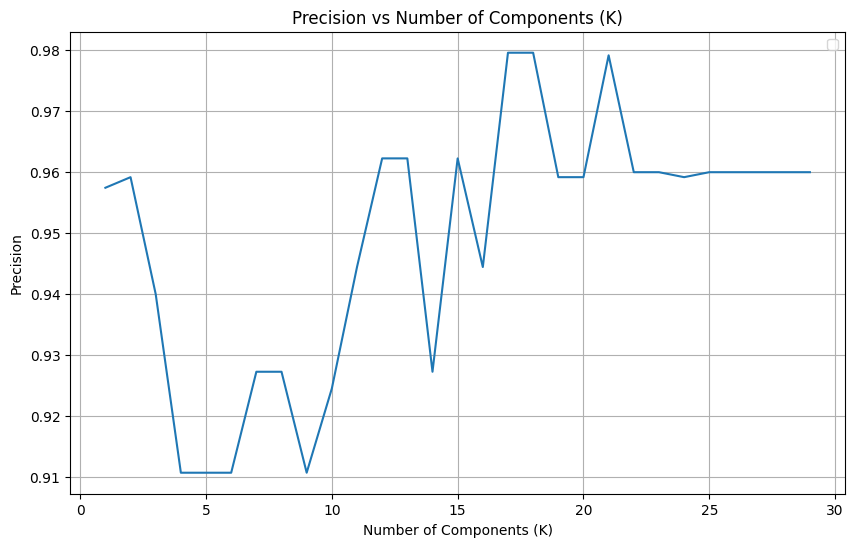

In [125]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K)')
plt.legend()

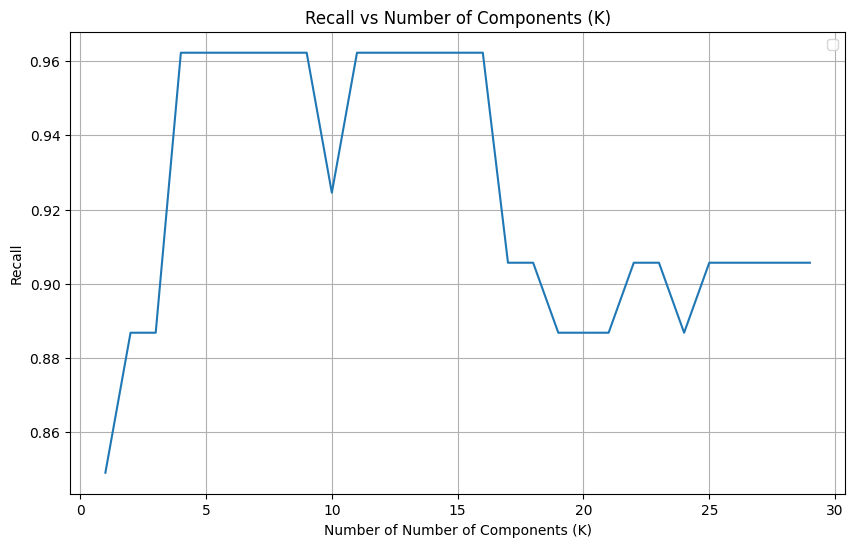

In [126]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K)')
plt.legend()

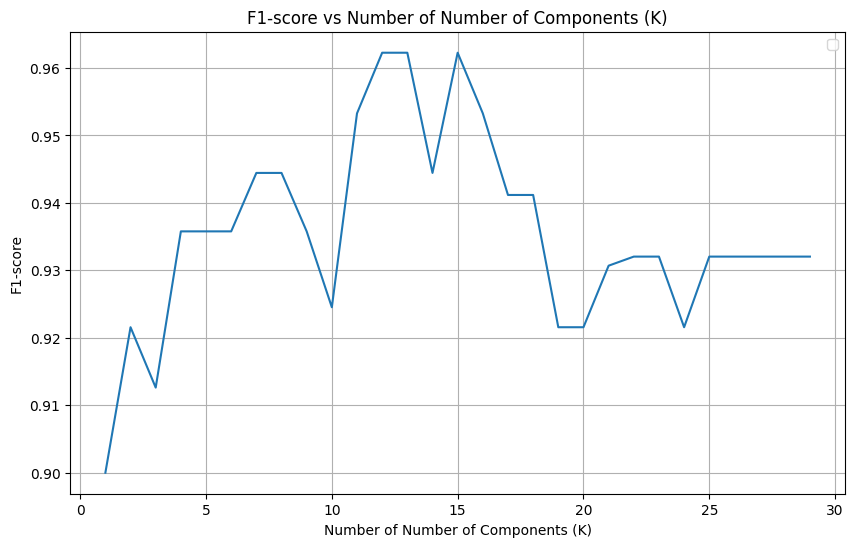

In [127]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K)')
plt.legend()

## Problem V
### Can you repeat problem 4? This time, replace the Bayes classifier with logistic regression. Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.

### Logitic Regression Classifier

In [128]:
K=29
accur = np.zeros((K,2))
prec = np.zeros((K,2))
rec = np.zeros((K,2))
f1 = np.zeros((K,2))

for i in range(K):
    # X = df_cancer.iloc[:,1:31].values
    # Y = df_cancer.iloc[:,31].values
    # print(i)
    decomposer = PCA(n_components=i+1)
    X_r = decomposer.fit(X).transform(X)
    X_train_r, X_test_r, Y_train, Y_test = train_test_split(X_r,Y, test_size=0.25, random_state = 0)
    sc_X = StandardScaler()
    X_train_r = sc_X.fit_transform(X_train_r)
    X_test_r = sc_X.transform(X_test_r)
    classifier = GaussianNB()
    classifier.fit(X_train_r, Y_train)
    Y_pred = classifier.predict(X_test_r)
    accur [ i, 0]=i+1
    accur [i,1] = metrics.accuracy_score(Y_test, Y_pred)
    prec [ i, 0]=i+1
    prec [i,1] = metrics.precision_score(Y_test, Y_pred)
    rec [ i, 0]=i+1
    rec [i,1] = metrics.recall_score(Y_test, Y_pred)
    f1 [ i, 0]=i+1
    f1 [i,1] = metrics.f1_score(Y_test, Y_pred)

maximum_accur = max(accur[:,1])
print("Maximum Accuracy is:", maximum_accur)
print("Maximum Accuracy is at K:", accur[accur[:,1] == maximum_accur][0,0])


Maximum Accuracy is: 0.9370629370629371
Maximum Accuracy is at K: 4.0


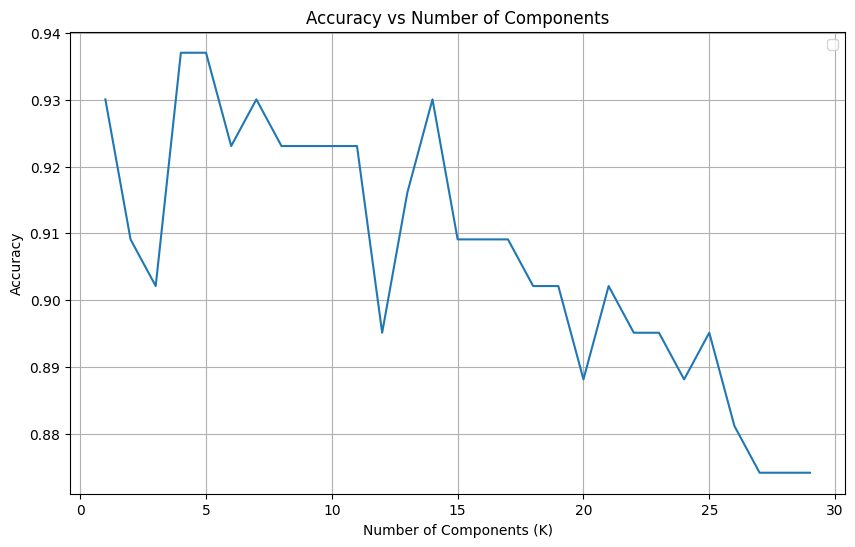

In [129]:
plt.plot(accur[:,0],accur[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.legend()

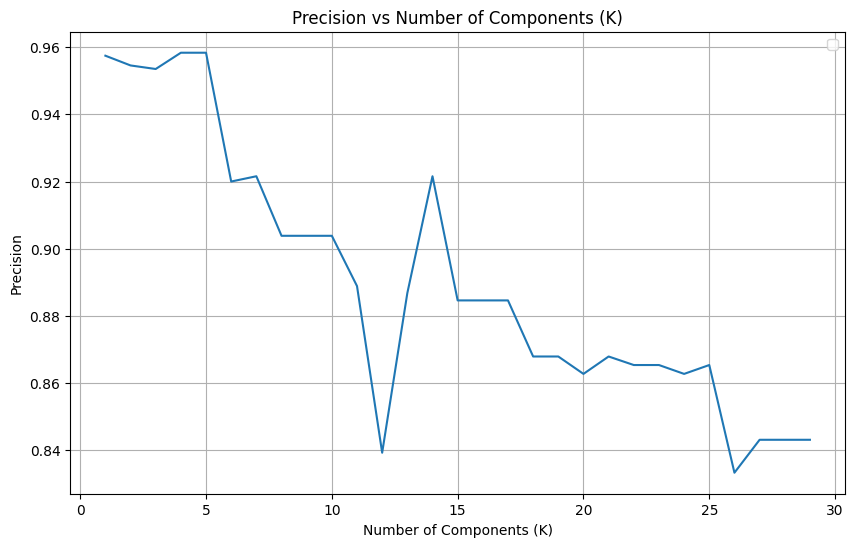

In [130]:
plt.plot(prec[:,0],prec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Components (K)')
plt.ylabel('Precision')
plt.title('Precision vs Number of Components (K)')
plt.legend()

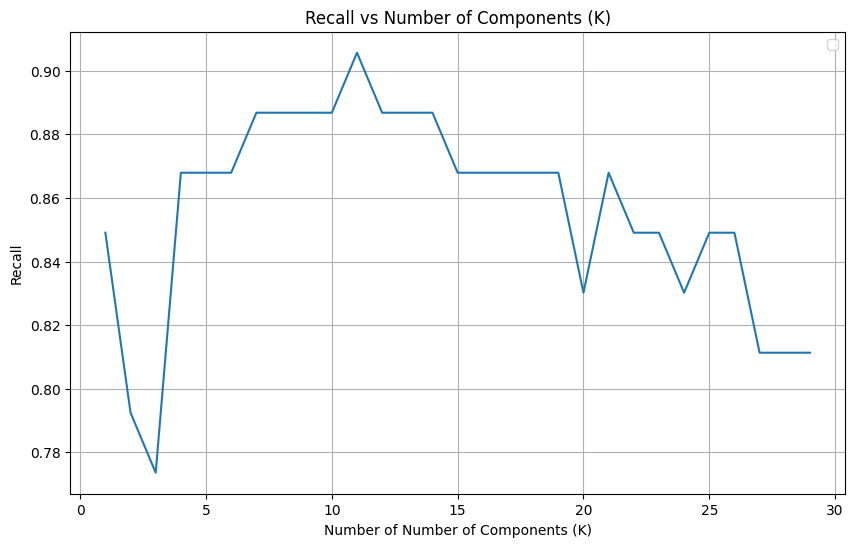

In [131]:
plt.plot(rec[:,0],rec[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Components (K)')
plt.legend()

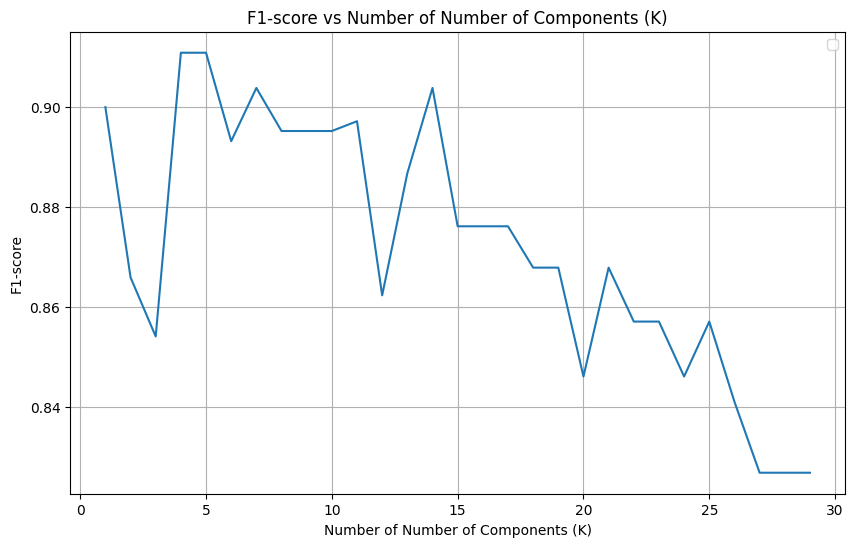

In [132]:
plt.plot(f1[:,0],f1[:,1])
plt.rcParams["figure.figsize"] = (10,6)
plt.grid(1)
plt.xlabel('Number of Number of Components (K)')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Number of Components (K)')
plt.legend()